## Set df

In [ ]:
import pandas as pd

df = pd.read_excel(r"C:\Users\hikar\Desktop\2025_radio\5_タイプ検証\timeline_type_分析後.xlsx")
df["year"] = pd.to_datetime(df["year"], format="%Y") #yearのフォーマットを数字から年月日に変更
df = df.set_index("year")

df_radio = df[["radio"]]
df_tv = df[["tv"]]
df_newspaper = df[["newspaper"]]
df_book = df[["book"]]
df_net = df[["internet"]]

df_radio

,radio
year,
1923-01-01,12
1924-01-01,7
1925-01-01,24
1926-01-01,4
1927-01-01,2
...,...
2019-01-01,40
2020-01-01,29
2021-01-01,29


## データの観察

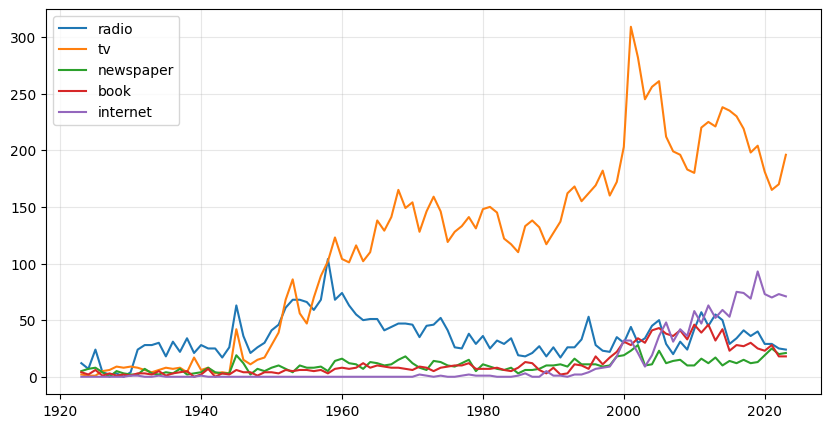

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))


plt.plot(df_radio.index, df_radio["radio"],label="radio")
plt.plot(df_tv.index,df_tv["tv"],label="tv")
plt.plot(df_newspaper.index,df_newspaper["newspaper"],label="newspaper")
plt.plot(df_book.index,df_book["book"],label="book")
plt.plot(df_net.index,df_net["internet"],label="internet")

plt.grid(True, linestyle="-", alpha=0.3)

plt.legend()

plt.show()

### STL分解

**radio**

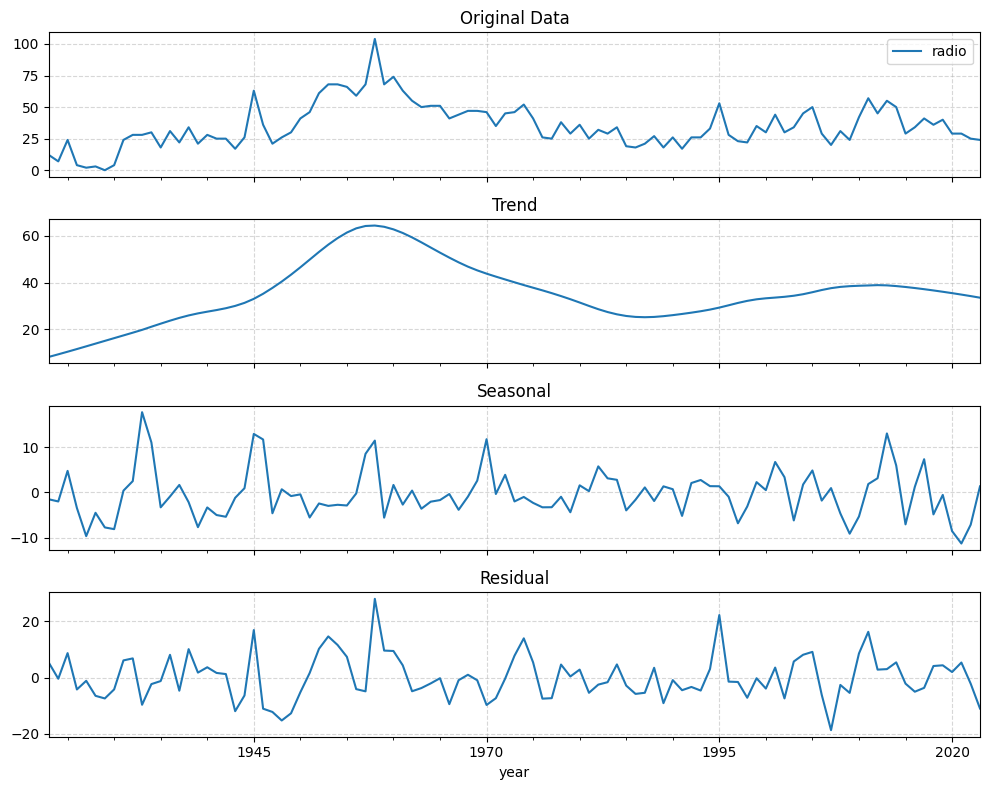

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_radio, period=12)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df_radio.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(df_radio)

# 結果を表示
print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
print('臨界値\t:')
for key, value in result[4].items():
    print('\t%s\t: %.3f' % (key, value))

# p値を評価
if result[1] < 0.05:
    print("時系列データは定常であると考えられます。")
else:
    print("時系列データは定常であるとは言えません。")

統計検定量	: -2.981046
p値	: 0.036703
臨界値	:
	1%	: -3.498
	5%	: -2.891
	10%	: -2.583
時系列データは定常であると考えられます。


**tv**

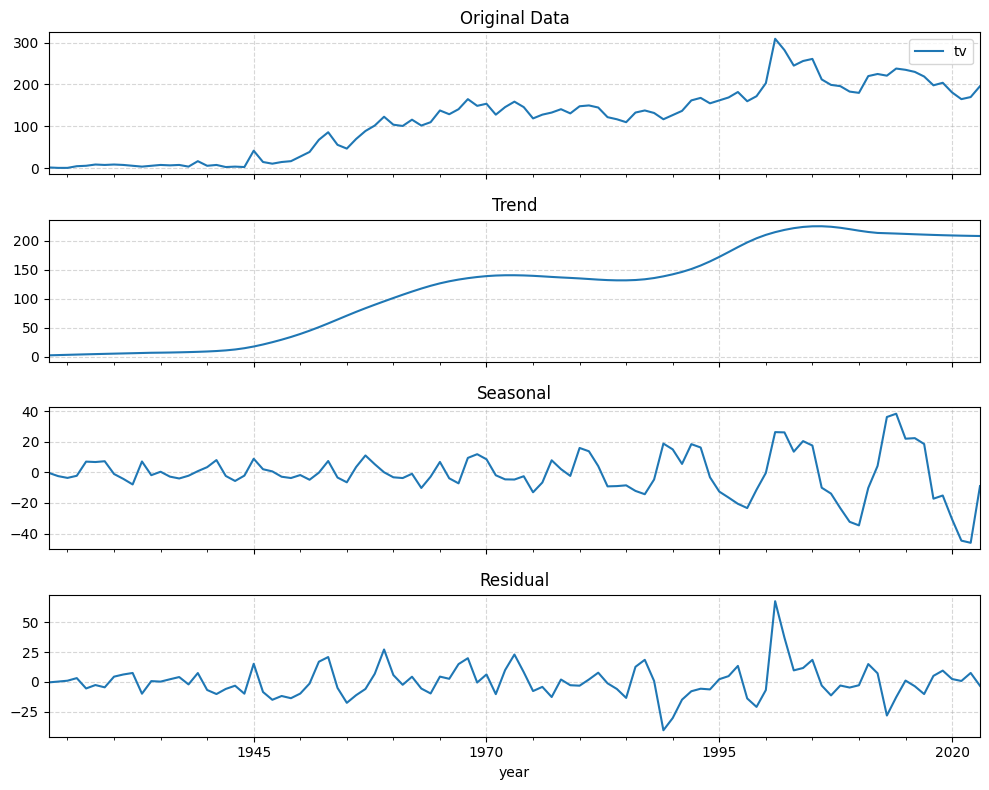

In [15]:
stl = STL(df_tv, period=12)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df_tv.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

**newspaper**

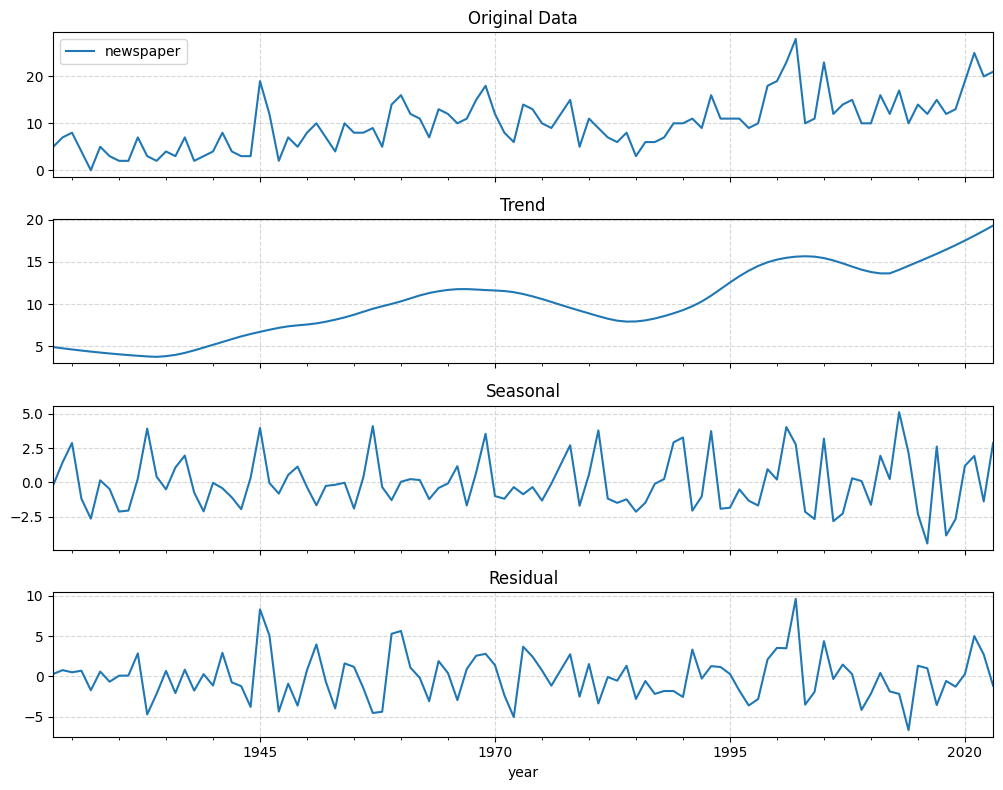

In [14]:
stl = STL(df_newspaper, period=12)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df_newspaper.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

**book**

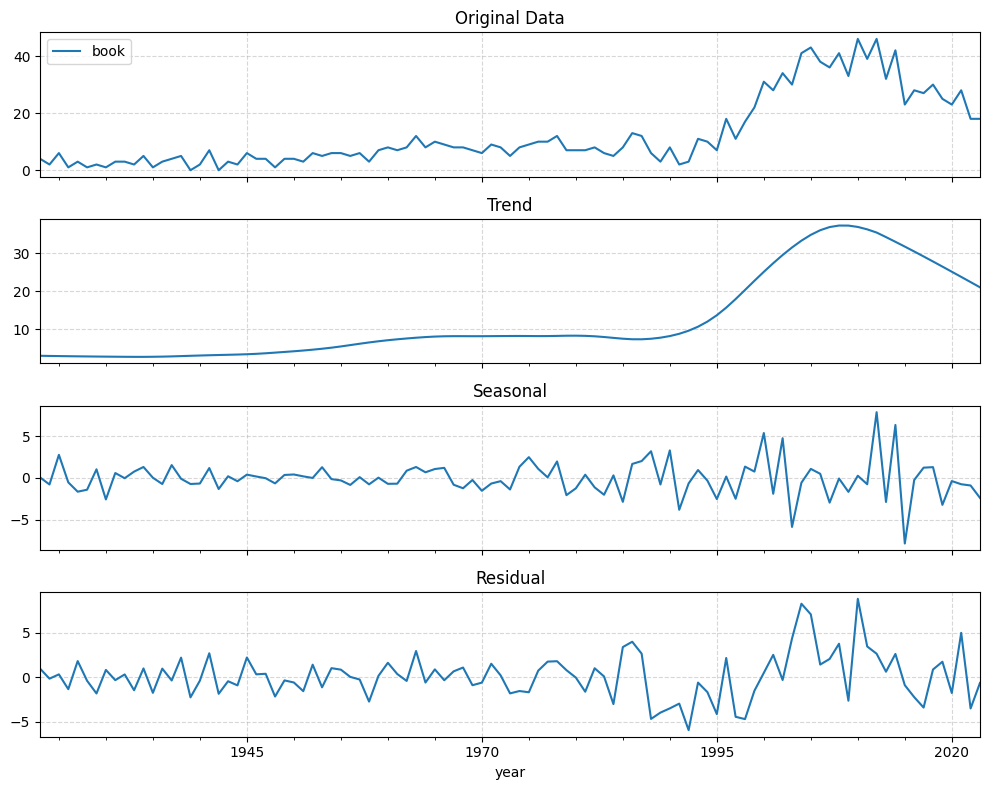

In [13]:
stl = STL(df_book, period=12)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df_book.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

**internet**

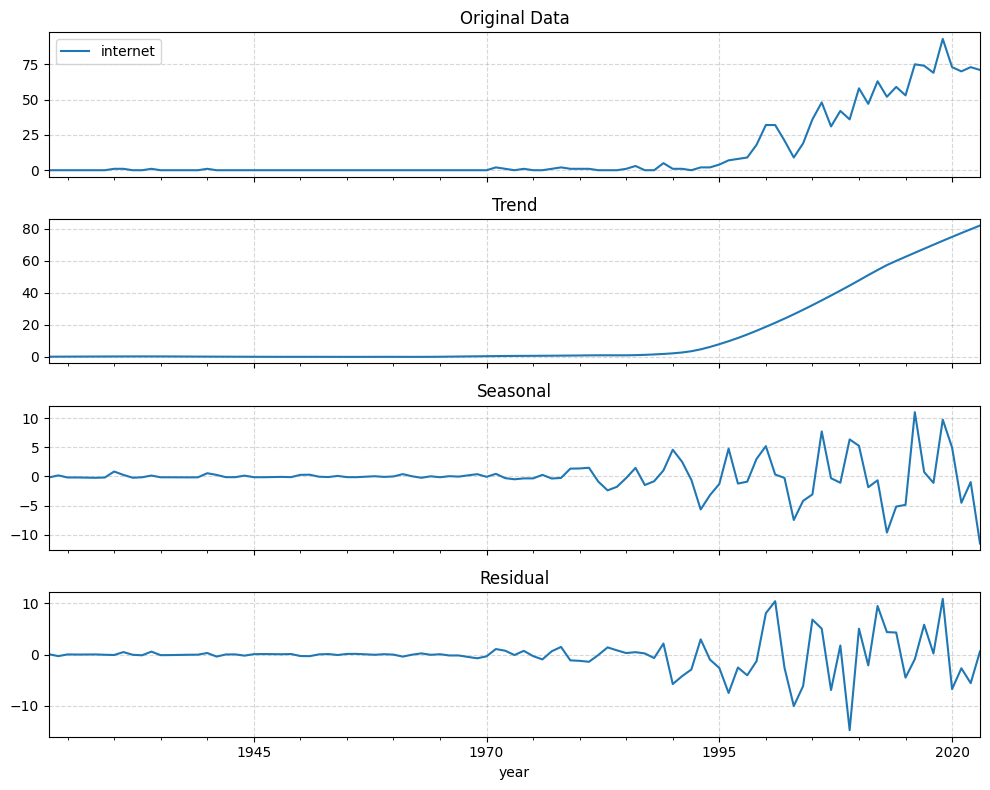

In [12]:
stl = STL(df_net, period=10)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df_net.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()